# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
#  Create a Beautiful Soup object and use it to scrape the data in the HTML table.

html = browser.html
soup = BeautifulSoup(html, 'html.parser')

# Find the table
table = soup.find('table', class_='table')

# Find all the rows in the table
mars_weather_data = {}
rows = table.find_all('tr')

# Extract the table headers
headers = [th.text.strip() for th in table.find_all('th')]

# Initialize the mars_weather_data dictionary with header keys
mars_weather_data = {header: [] for header in headers}

# Loop through the rows and extract the data
for row in rows[1:]:  # Skip the header row
    cells = row.find_all('td')
    for header, cell in zip(headers, cells):
        mars_weather_data[header].append(cell.text.strip())

print(mars_weather_data)


{'id': ['2', '13', '24', '35', '46', '57', '68', '79', '112', '114', '123', '134', '145', '156', '163', '170', '171', '172', '173', '175', '176', '177', '178', '179', '180', '181', '182', '183', '184', '185', '186', '187', '188', '189', '190', '191', '192', '193', '194', '195', '196', '197', '198', '199', '200', '201', '202', '203', '204', '205', '206', '207', '208', '209', '210', '211', '212', '213', '214', '215', '216', '217', '218', '219', '220', '221', '222', '223', '224', '225', '226', '227', '228', '229', '230', '231', '233', '234', '235', '236', '237', '238', '239', '240', '241', '242', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '69', '70', '71', '72', '73', '74', '75', '76'

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [5]:
# Convert mars_weather_data to a DataFrame
mars_weather_df = pd.DataFrame(mars_weather_data)

# Print the DataFrame
print(mars_weather_df)  

        id terrestrial_date   sol   ls month min_temp pressure
0        2       2012-08-16    10  155     6    -75.0    739.0
1       13       2012-08-17    11  156     6    -76.0    740.0
2       24       2012-08-18    12  156     6    -76.0    741.0
3       35       2012-08-19    13  157     6    -74.0    732.0
4       46       2012-08-20    14  157     6    -74.0    740.0
...    ...              ...   ...  ...   ...      ...      ...
1862  1889       2018-02-23  1973  133     5    -78.0    730.0
1863  1892       2018-02-24  1974  134     5    -77.0    729.0
1864  1894       2018-02-25  1975  134     5    -76.0    729.0
1865  1893       2018-02-26  1976  135     5    -77.0    728.0
1866  1895       2018-02-27  1977  135     5    -77.0    727.0

[1867 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [6]:
# Examine data type of each column
print(mars_weather_df.dtypes)


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [7]:
# Convert the 'terrestrial_date' column to a datetime data type
mars_weather_df['terrestrial_date'] = pd.to_datetime(mars_weather_df['terrestrial_date'])

# Convert the 'sol' column to an integer data type
mars_weather_df['sol'] = mars_weather_df['sol'].astype(int)

# Convert the 'ls' column to an integer data type
mars_weather_df['ls'] = mars_weather_df['ls'].astype(int)

# Convert the 'month' column to an integer data type
mars_weather_df['month'] = mars_weather_df['month'].astype(int)

# Convert the 'min_temp' column to a float data type
mars_weather_df['min_temp'] = mars_weather_df['min_temp'].astype(float)

# Convert the 'pressure' column to a float data type
mars_weather_df['pressure'] = mars_weather_df['pressure'].astype(float)

# Print the updated data types
print(mars_weather_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [8]:
# 1. How many months are there on Mars?
# Count the number of records for each unique month
month_counts = mars_weather_df['month'].value_counts().sort_index()
print(month_counts)

# The number of months on Mars is the count of unique values in the 'month' column
num_mars_months = mars_weather_df['month'].nunique()
print(f"\nNumber of months on Mars: {num_mars_months}")

month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64

Number of months on Mars: 12


In [9]:
# 2. How many Martian days' worth of data are there?
# The number of Martian days' worth of data is the count of unique values in the 'sol' column
num_martian_days = mars_weather_df['sol'].nunique()
print(f"\nNumber of Martian days' worth of data: {num_martian_days}")



Number of Martian days' worth of data: 1867


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


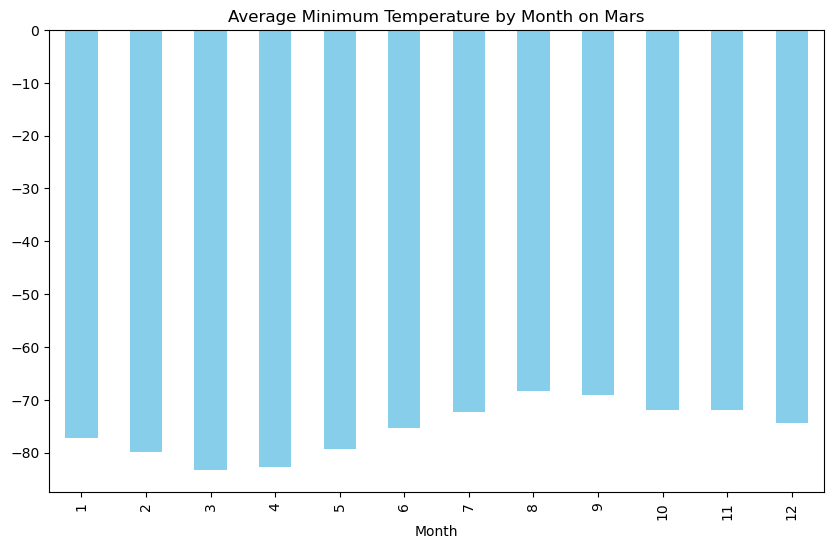

In [10]:
# What are the coldest and warmest months on Mars?
# Calculate the average minimum temperature for each month
avg_min_temp_by_month = mars_weather_df.groupby('month')['min_temp'].mean()
print(avg_min_temp_by_month)

# Plot the average temperature by month
plt.figure(figsize=(10, 6))
avg_min_temp_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')

# Save the plot to a PNG file to the output folder "Plot Results & Data"
plt.savefig('avg_min_temp_by_month_plot.png')


Coldest month: 3
Hottest month: 8


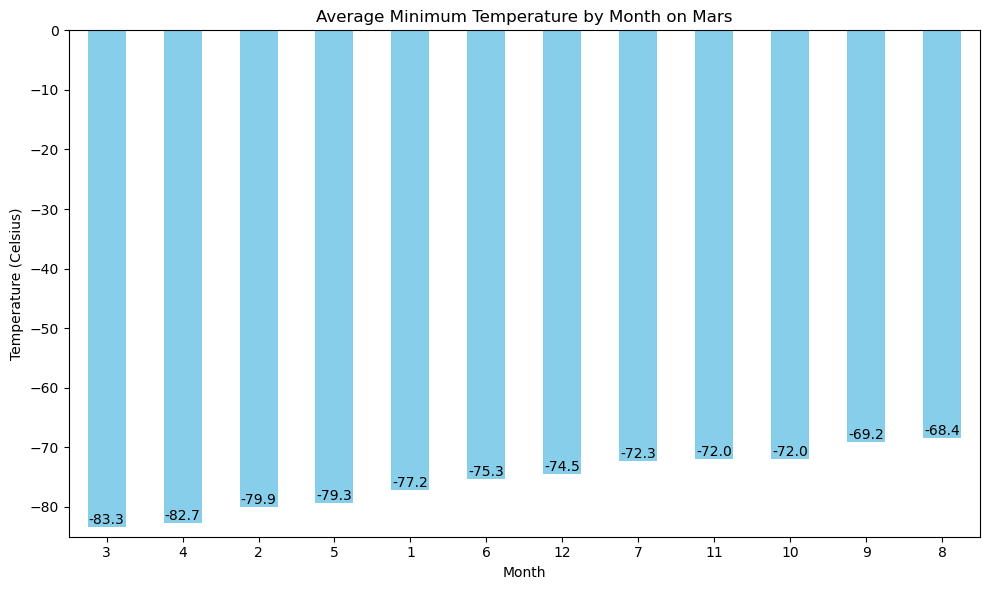

In [11]:

# Identify the coldest and hottest months in Curiosity's location
# Sort the average minimum temperatures from coldest to warmest
sorted_avg_min_temp = avg_min_temp_by_month.sort_values()

# Identify the coldest and hottest months
coldest_month = sorted_avg_min_temp.index[0]
hottest_month = sorted_avg_min_temp.index[-1]

print(f"Coldest month: {coldest_month}")
print(f"Hottest month: {hottest_month}")

# Plot the sorted average temperature by month
plt.figure(figsize=(10, 6))
sorted_avg_min_temp.plot(kind='bar', color='skyblue')
plt.title('Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')
plt.xticks(rotation=0)

# Add labels to the bars
for i, temp in enumerate(sorted_avg_min_temp):
    plt.text(i, temp, f'{temp:.1f}', ha='center', va='bottom')

# Customize y-axis
plt.ylim(-85, 0)  # Extend y-axis range to create buffer
plt.yticks(range(-80, 1, 10))

# Customize x-axis to create buffer
plt.xlim(-0.5, len(sorted_avg_min_temp) - 0.5)

# Remove the legend and tight_layout
plt.legend().remove()

plt.tight_layout()  # Adjust layout to prevent cutoff

# Save the plot to a PNG file to the output folder "Plot Results & Data"
plt.savefig('avg_min_temp_by_month_plot_sorted_by_temp.jpg')

# Display the plot
plt.show()


In [12]:
# 4. Average pressure by Martian month
avg_pressure_by_month = mars_weather_df.groupby('month')['pressure'].mean()

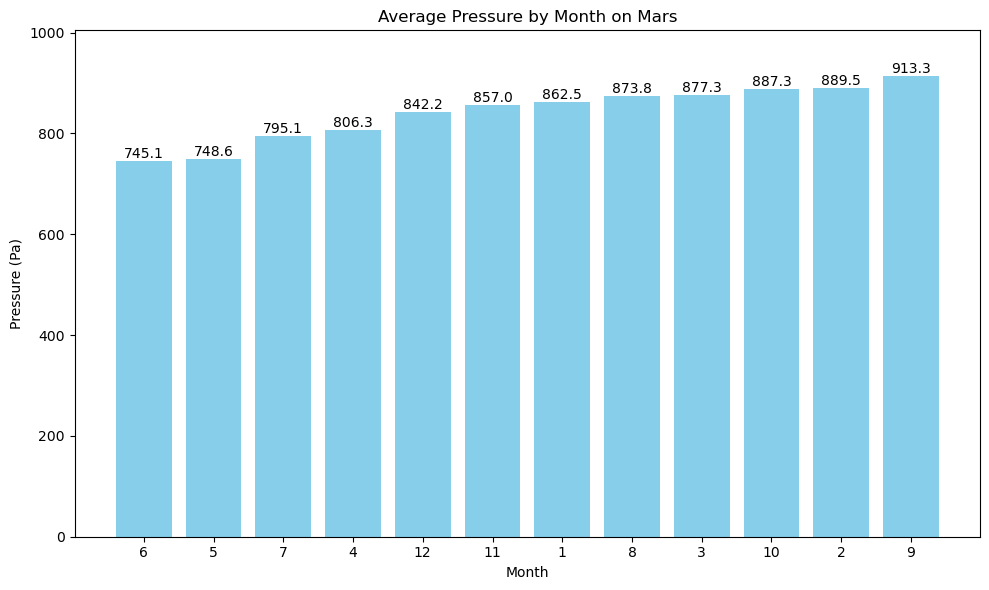

In [13]:
# Plot the average pressure by month (sort from lowest to highest)
plt.figure(figsize=(10, 6))
sorted_pressure = avg_pressure_by_month.sort_values()
bars = plt.bar(range(len(sorted_pressure)), sorted_pressure, color='skyblue')
plt.title('Average Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Pressure (Pa)')
plt.xticks(range(len(sorted_pressure)), sorted_pressure.index, rotation=0)

# Add labels to the bars with improved positioning
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom', rotation=0)

# Adjust y-axis to create some space above the highest bar
plt.ylim(0, max(sorted_pressure) * 1.1)

plt.tight_layout()

# Save the plot to a PNG file to the output folder "Plot Results & Data"
plt.savefig('avg_pressure_by_month_plot.png')

# Display the plot
plt.show()


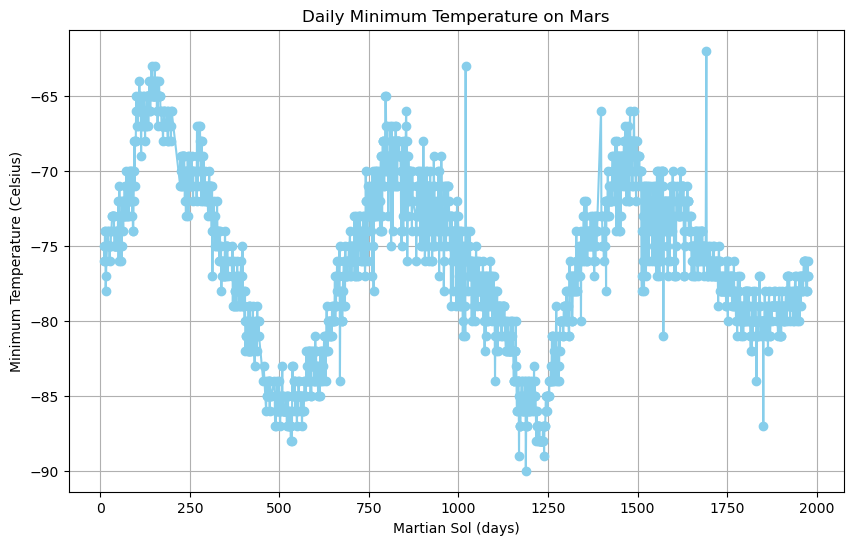

<Figure size 640x480 with 0 Axes>

In [14]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Consider how many days elapse on Earth in the time that Mars circles the Sun once.
# Visually estimate the result by plotting the daily minimum temperature.

# Plot the daily minimum temperature
plt.figure(figsize=(10, 6))
plt.plot(mars_weather_df['sol'], mars_weather_df['min_temp'], marker='o', linestyle='-', color='skyblue')
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Martian Sol (days)')
plt.ylabel('Minimum Temperature (Celsius)')
plt.grid(True)

# Save the plot to a PNG file to the output folder "Plot Results & Data"
plt.savefig('daily_min_temp_plot.png')

# Display the plot
plt.show()

# Clear the current figure
plt.clf()


Estimated number of days in a Martian year: 770
Actual number of Earth days in a Martian year: 687
Estimation error: 12.08%


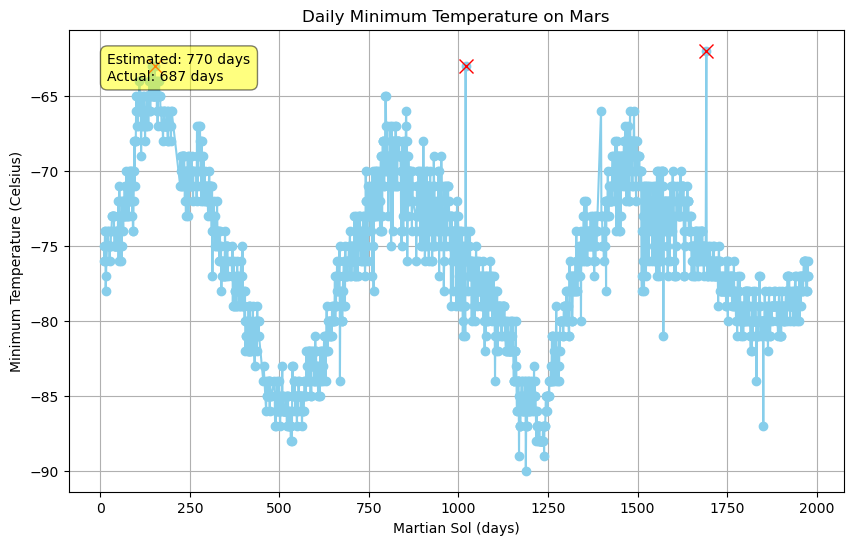

In [15]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Consider how many days elapse on Earth in the time that Mars circles the Sun once.
# Visually estimate the result by plotting the daily minimum temperature.

# Import numpy
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Plot the daily minimum temperature
plt.figure(figsize=(10, 6))
plt.plot(mars_weather_df['sol'], mars_weather_df['min_temp'], marker='o', linestyle='-', color='skyblue')
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Martian Sol (days)')
plt.ylabel('Minimum Temperature (Celsius)')
plt.grid(True)

# Estimate the number of terrestrial days in a Martian year
# Find the indices of the peaks (yearly cycle)
peak_indices, _ = signal.find_peaks(mars_weather_df['min_temp'], distance=500)

# Calculate the distances between consecutive peaks
peak_distances = np.diff(mars_weather_df['sol'].iloc[peak_indices])

# Calculate the average distance between peaks
avg_distance = np.mean(peak_distances)

# Print the estimated number of days in a Martian year
print(f"Estimated number of days in a Martian year: {avg_distance:.0f}")

# Compare with the actual value
actual_mars_year = 687
print(f"Actual number of Earth days in a Martian year: {actual_mars_year}")

# Calculate and print the error
error = abs(avg_distance - actual_mars_year) / actual_mars_year * 100
print(f"Estimation error: {error:.2f}%")

# Annotate the plot with the estimated and actual values
plt.annotate(f"Estimated: {avg_distance:.0f} days\nActual: {actual_mars_year} days", 
             xy=(0.05, 0.95), xycoords='axes fraction',
             fontsize=10, ha='left', va='top',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5))

# Mark the peaks on the plot
plt.plot(mars_weather_df['sol'].iloc[peak_indices], mars_weather_df['min_temp'].iloc[peak_indices], "x", color='red', markersize=10)

# Save the plot to a PNG file to the output folder "Plot Results & Data"
plt.savefig('daily_min_temp_plot_with_estimation.png')

# Display the plot
plt.show()

# Close the figure to free up memory
plt.close()



On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days (estimated at 770 but this estimate is from outlier temp nodes). A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [16]:
# Write the data to a CSV file to the output folder "Plot Results & Data"
mars_weather_df.to_csv('mars_weather_data.csv', index=False)

In [17]:
browser.quit()